# Ma412 - 2023/2024

# Lab 4: Support Vector Machine 

The objective of this  session is to introduce and code a Support Vector Machine classifier.

## Set-Up
---

First we will import the packages that we will need throughout the notebook.

In [16]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## <font color='black'>Support Vector Machines</font>

---
We will begin by with a 2D example dataset which can be separated by a linear boundary. 

### Dataset 1

(51, 2)


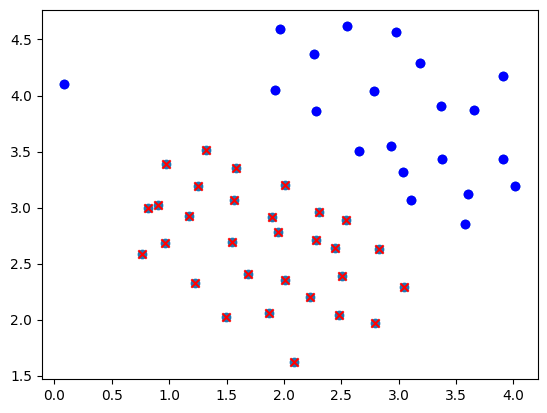

In [17]:
data = loadmat(os.path.join('data', 'ex4data1.mat'))
X, y = data['X'], data['y'][:, 0]

print(X.shape)
pyplot.scatter(X[:,0],X[:,1])
# Plot training data
utils.plotData(X, y)

In this dataset, the positives examples are easily separated from the negative examples by the gap between them. 

Within mathematical analysis, regularization perspectives on SVMs provide a way of interpreting them in the context of other regularization-based machine-learning algorithms. Hence, the decision function of a SVM classifier is obtained through the minimization of the following optimization problem:

$$min_{f}C\sum_{i}^n\max(0,1-y_if(x_i))+||f||^2\$$

You will now study the effect of the parameter $C$ (scaling the regularization parameter when using SVMs for classification). For more details, see https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html.

You will train the SVM model with $C = 1$. You should find that the SVM puts the decision boundary in the gap between the two populations missclassifying the data point on the far left.

You can try different values of $C$. In other words you can hange the value of $C$ in the next cell to $C = 100$ and run the SVM training again. For $C = 100$, you will find that the SVM classifies every example correctly.

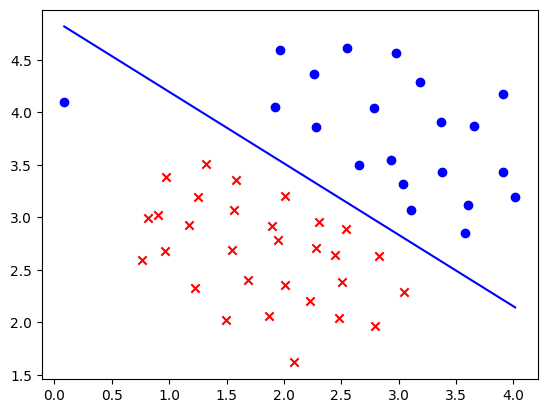

In [18]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

C = 1
model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

You can try now different values of $C$. In other words you can change the value of $C$ in the next cell to $C = 100$, $C=1000$ and run the SVM training again. For which value of $C$, SVM classifies every example correctly?

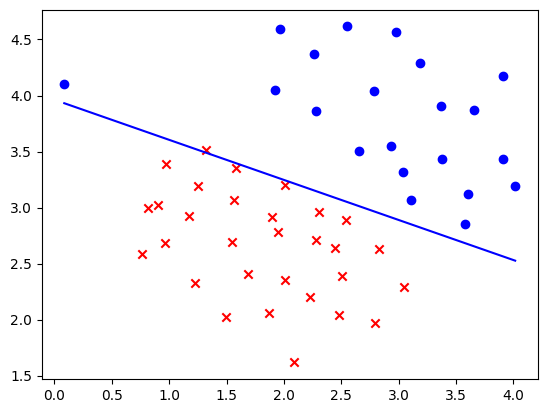

In [19]:
C = 100
model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)


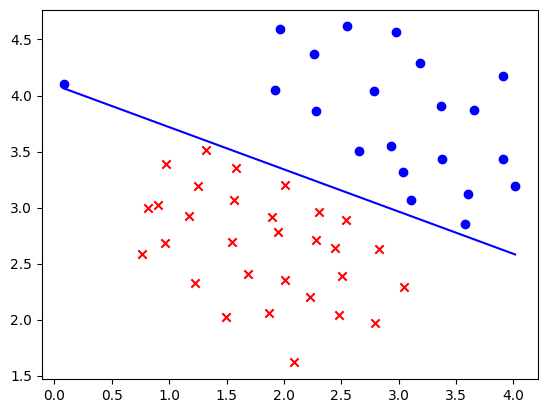

In [20]:
C = 1000
model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

SVM for C = 1 has a big margin, but classifies 1 outlier wrong. SVM with c = 100 decreases the margin, but still has not classified correctly 1 outlier.
SVM with C = 1000 has a small margin, but classifies every points in the dataset correctly. 

### SVMs with Gaussian Kernels

You will use now SVMs for non-linear classification. In particular, SVMs with Gaussian kernels will be exploited on datasets that are not linearly separable.

#### Gaussian Kernel

In order to obtain non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. We defined the Gaussian kernel as a similarity function between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is parameterized by $\gamma=\frac{1}{2\sigma^2}$, which determines how fast the similarity metric decreases as the examples are further apart.


$$k(x^{(i)},x^{(j)})=\exp(-\gamma{||x^{(i)}-x^{(j)}||^2}) $$

Complete the code in `gaussianKernel`.

In [21]:
# EDIT THIS CELL
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    squared_norm = np.sum((x1-x2)**2)
    return np.exp(squared_norm / (-2*sigma**2))
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1,x2,sigma)

Once you have completed the function gaussianKernel, test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [22]:
# EDIT THIS CELL

print(sim)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

0.32465246735834974
Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



### Example 1

In this part of this notebook we will work with dataset 2 displayed below. 

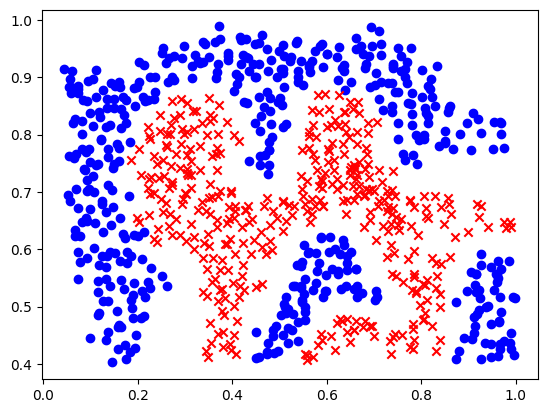

In [23]:
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex4data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. 

If you have correctly implemented the Gaussian kernel function, in the following cell proceed to train the SVM with the Gaussian kernel on this dataset then visualize the boundaries. 

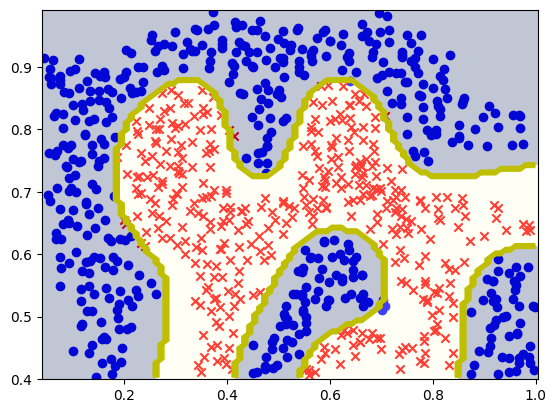

In [24]:
# EDIT THIS CELL
# SVM Parameters
C = 1
sigma = 0.1
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)


The Gaussian kernel does perform well on this kernel, but it doesn't catch a few outliers of the dataset.

### Example 2
To gain more practical skills on how to use a SVM with a Gaussian kernel, The code below will load and display a new dataset.

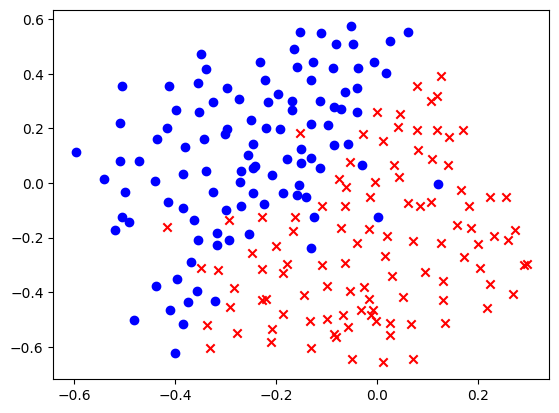

In [25]:
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex4data3.mat'))
X, y, Xval,yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]
# Plot training data
utils.plotData(X, y)

In the provided dataset, you are given the variables X, y, Xval, yval. Your task is to use the cross validation set Xval, yval to determine the best $C$ and parameter $\sigma$ to use. 
For both $C$ and $\sigma$ we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for  $C$ and $\sigma$. 

For example, if you try each of the 8 values listed above for $C$ and for $\sigma$ , you would end up training and evaluating (on the cross validation set) a total of  $8^2=64$ different models. After you have determined the best $C$ and $\sigma$ parameters to use, you should modify the code in `BestParams`, filling in the best parameters.

Implementation tip: When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. In python, you can compute this error using np.mean(predictions != yval) * 100), where predictions is a vector containing all the predictions from the SVM, and yval are the true labels from the cross validation set. You can use the svmPredict function to generate the predictions for the cross validation set.

In [26]:
def BestParams(X, y, Xval, yval):

    C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    err_min = 100
    c_min = 0
    s_min = 0
    for c in C:
        for s in sigma:
            model = utils.svmTrain(X, y, c, gaussianKernel, args=(s,))
            ypre = utils.svmPredict(model,Xval)
            err = np.mean(ypre != yval) * 100
            if err < err_min:
                c_min = c
                s_min = s
                err_min = err
    print("Minimum error rate : ", err)
    return c_min, s_min


Minimum error rate :  21.0
C =  1
sigma =  0.1


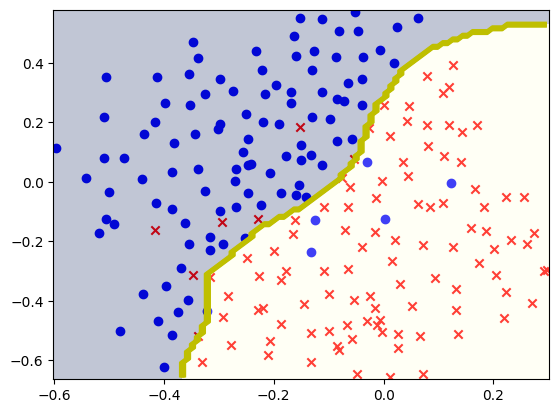

In [27]:
C, sigma = BestParams(X, y, Xval, yval);
model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print("C = ",C)
print("sigma = ",sigma)

The SVM model with Gaussian Kernel (C = 1 and sigma = 0.1 ) does manage to have an 21 % error on the evaluation dataset. This seems to show that for that example, favorising the margin rather with a small C than the fitting produced the better results.
This does make sense, as this dataset has a lot of outliers, and to try to catch all these would not work.

The best sigma is also small, because the lesser the sigma the less linear the boudary will be. As we can see, it would not be appropriate for this model. 

The Gaussian kernel is appropriated when there is no prior knowledge over the data, as in these examples. The sigma value determines the importance of the points closer to the decision boudary, and C is the cost associated with the margin. The smaller the C, the bigger the margin will be.

A small C and gamma (a high sigma) will underfit the model, and a high gamma (a small sigma) and c will overfit it.